# Machine Learning Engineer Nanodegree

## Capstone Project

# Avito Demand Prediction Challenge
Sachin Lamba

Mar, 2019

## I. Definition

### Project Overview

Today, any website we visit always tried to recommend something depending on our taste (or we can say history). Machine Learning is a field to check from data what history can say about our future tastes.

In India, Some companies like OLX are helping their users to sell their products online. But What Sellers (Customer for company) don’t know about it is that what details they are filling, can make their items price go up or down. Machine Learning can help in predicting the likelihood of the price depending on the info provided by the seller and directly suggest that seller what need to be updated to make more effective product sell. 

Similar to this situation, Avito (Russian based company) created a challenge on kaggle (https://www.kaggle.com/c/avito-demand-prediction) to predict demand for an online advertisement based on its full description, its context and historical demand for similar ads in similar contexts.
 
I want to check how provided details of a product can affect its demand in live market. It is like a recommended system, except that the user will get a prediction of how well their product is and how well he defined it for a profit.


### Problem Statement

When selling used goods online, a combination of tiny, nuanced details in a product description can make a big difference in drumming up interest. Details like:


![alt text][logo]

[logo]: ./statement.png "Logo Title Text 2"

And, even with an optimized product listing, demand for a product may simply not exist–frustrating sellers who may have over-invested in marketing.
Avito, Russia’s largest classified advertisements website, is deeply familiar with this problem. Sellers on their platform sometimes feel frustrated with both too little demand (indicating something is wrong with the product or the product listing) or too much demand (indicating a hot item with a good description was underpriced).
In this Kaggle competition, Avito is challenging to predict demand for an online advertisement based on its full description (title, description, images, etc.), its context (geographically where it was posted, similar ads already posted) and historical demand for similar ads in similar contexts. With this information, Avito can inform sellers on how to best optimize their listing and provide some indication of how much interest they should realistically expect to receive.

I want to take a subset of their data to test and verify how prediction by details help a user to get best price of their product.

I will be treating this problem as Regression one. As the value can be in [0,1] both inclusive, as we can never be sure 100% of ad demand.


### Metrics

Metrics are used to evaluate how our algorithms are working. As per the Kaggle challenge, I will be using the following metric:

\\[ RMSE = {\sqrt{ \sum_{i=1}^n (y - y_i ̂  )^2 \over n } } \\]

Where

\\[ predicted Value => y_i ̂  \\]


\\[ original Value => y \\] 


## II. Analysis

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### Data Exploration

The dataset is composed of multiple CSV files but I will be mainly using train.csv & test.csv file. It has been obtained from a [Kaggle Competition provided by Avito](https://www.kaggle.com/c/avito-demand-prediction/data ).

The most important file is the train.csv file which has 18 columns containing user id, category, region, price, image flag etc along with the target variable deal_probability and has 1503424 rows. The test.csv is similar to the previous file discussed but does not have our target variable and we have to use these to predict the destination and has 508438 rows. We have a good amount of data to work with to produce meaningful models.

- train.csv - Train data
    - item_id - Ad id
    - user_id - User id
    - region - Ad region
    - city - Ad city
    - parent_category_name - Top level ad category as classified by Avito's ad model
    - category_name - Fine grain ad category as classified by Avito's ad model
    - param_1 - Optional parameter from Avito's ad model
    - param_2 - Optional parameter from Avito's ad model
    - param_3 - Optional parameter from Avito's ad model
    - title - Ad title
    - description - Ad description
    - price - Ad price
    - item_seq_number - Ad sequential number for user
    - activation_date- Date ad was placed
    - user_type - User type
    - image - Id code of image. Ties to a jpg file in train_jpg. Not every ad has an image
    - image_top_1 - Avito's classification code for the image
    - deal_probability - The target variable. This is the likelihood that an ad actually sold something. It's not possible to verify every transaction with certainty, so this column's value can be any float from zero to one
- test.csv - Test data. Same schema as the train data, minus deal_probability


In [4]:
all_train_dataset = pd.read_csv("./inputs/train.csv")
all_train_dataset.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


In [5]:
all_test_dataset = pd.read_csv("./inputs/test.csv")
all_test_dataset.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,NaN,NaN
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.0
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.0,70,2017-04-17,Private,NaN,NaN
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.0,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,1002.0


### Exploratory Visualization


#### Abstract Data:
- Training Data have about 1503424 rows.
- Testing data have 508438.
- ** Splitting our dataset in train:validation bins in ratio of ~~0.75:0.25~~ 0.85:0.15 .** As I go through my work, I updated my ratio for final run to this value.
- Deal_probability is the targeted column.

#### With multiple runs, I found differnt column names which have NaN values inside, so that I can fill those in my preprocessing step with empty strings or zeros.

Check different paramters and dtypes for columns for better understanding of data types.

In [12]:
# all_train_dataset.info()
for col in train_input.columns:
    if(col == "param_1" or col == "param_2" or col == "param_3" or col == "description" or col == "image"): # as NA exist in these columns
        print("Column Name:", col, "    #Unique Values(+1 extra):", len(np.unique(train_input[col].fillna("missing"))))
    else:
        print("Column Name:", col, "    #Unique Values:", len(np.unique(train_input[col])))

Column Name: item_id     #Unique Values: 1503424
Column Name: user_id     #Unique Values: 771769
Column Name: region     #Unique Values: 28
Column Name: city     #Unique Values: 1733
Column Name: parent_category_name     #Unique Values: 9
Column Name: category_name     #Unique Values: 47
Column Name: param_1     #Unique Values(+1 extra): 372
Column Name: param_2     #Unique Values(+1 extra): 272
Column Name: param_3     #Unique Values(+1 extra): 1220
Column Name: title     #Unique Values: 788377
Column Name: description     #Unique Values(+1 extra): 1317103
Column Name: price     #Unique Values: 102368
Column Name: item_seq_number     #Unique Values: 28232
Column Name: activation_date     #Unique Values: 21
Column Name: user_type     #Unique Values: 3
Column Name: image     #Unique Values(+1 extra): 1390837
Column Name: image_top_1     #Unique Values: 115650


In [6]:
train_output = all_train_dataset['deal_probability'].astype('float32')
train_input = all_train_dataset.drop(['deal_probability'], axis=1)
# del all_train_dataset['deal_probability'] ###### can be used
test_input = all_test_dataset.copy()

To check how the dataset vary with different `deal_probability`. In below graph, we can check it with 1% of the dataset that its more towards low range in `deal_probability`.

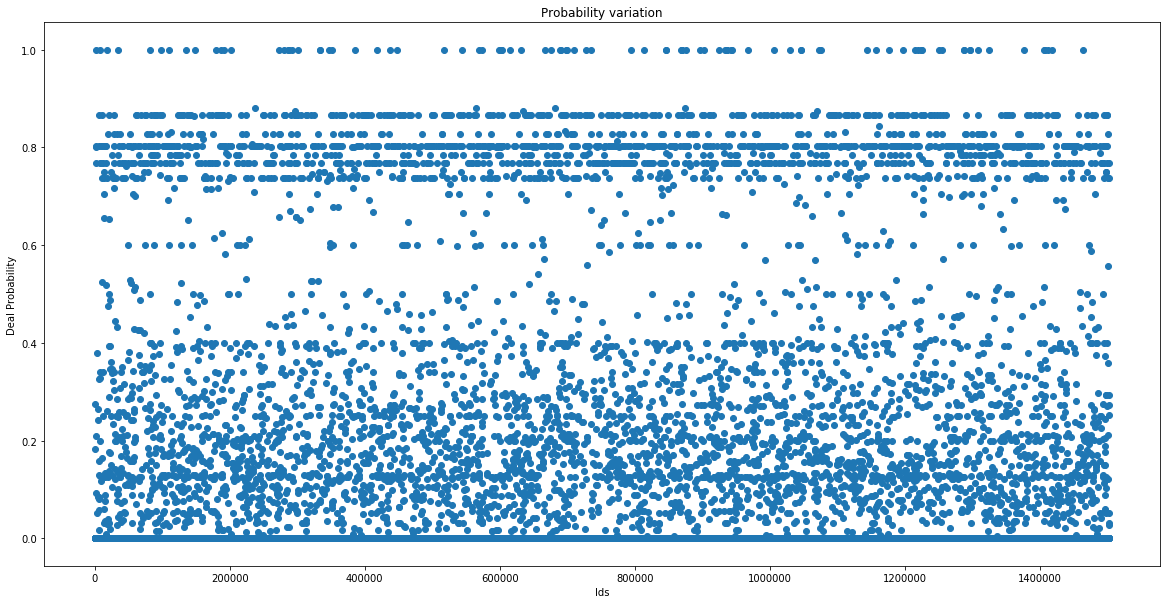

In [13]:
plt.figure(figsize=(20, 10))
dataToShow = 0.01 # percentage
indexes = np.random.randint(0, len(train_output), size=int(dataToShow * len(train_output)))
x_select = train_output.iloc[indexes]
plt.xlabel("Ids")
plt.ylabel("Deal Probability")
plt.title("Probability variation")

plt.scatter(indexes, x_select)
plt.show()

Below 3 graphs shows that `region`, `Category Name` and `Parent Category Name` have few unique values which can be encoded to numeric data for model training.

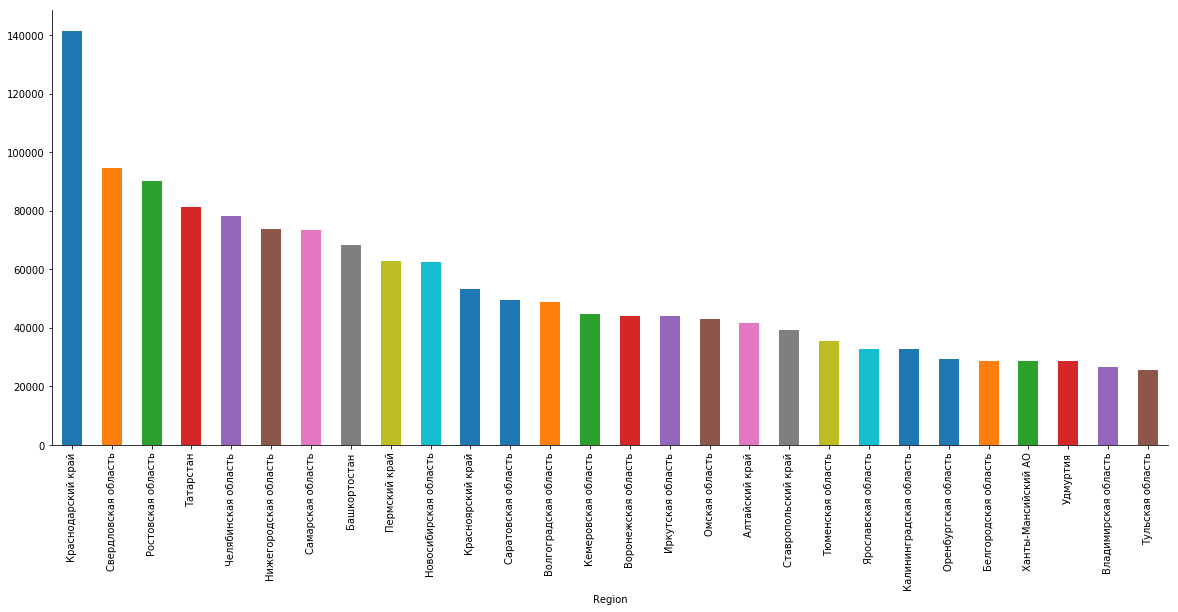

In [7]:
plt.figure(figsize=(20, 8))
all_train_dataset.region.value_counts(dropna=False).plot(kind='bar', rot=0)
plt.xlabel('Region')
plt.xticks(rotation=90)
sns.despine()

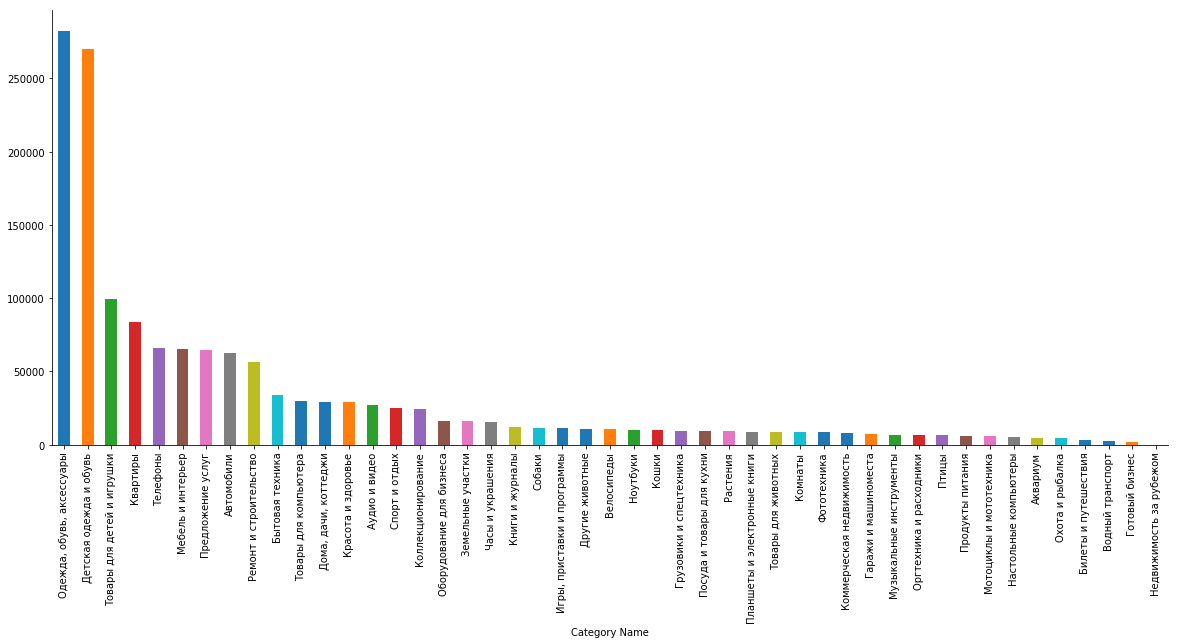

In [8]:
plt.figure(figsize=(20, 8))
all_train_dataset.category_name.value_counts(dropna=False).plot(kind='bar', rot=0)
plt.xlabel('Category Name')
plt.xticks(rotation=90)
sns.despine()

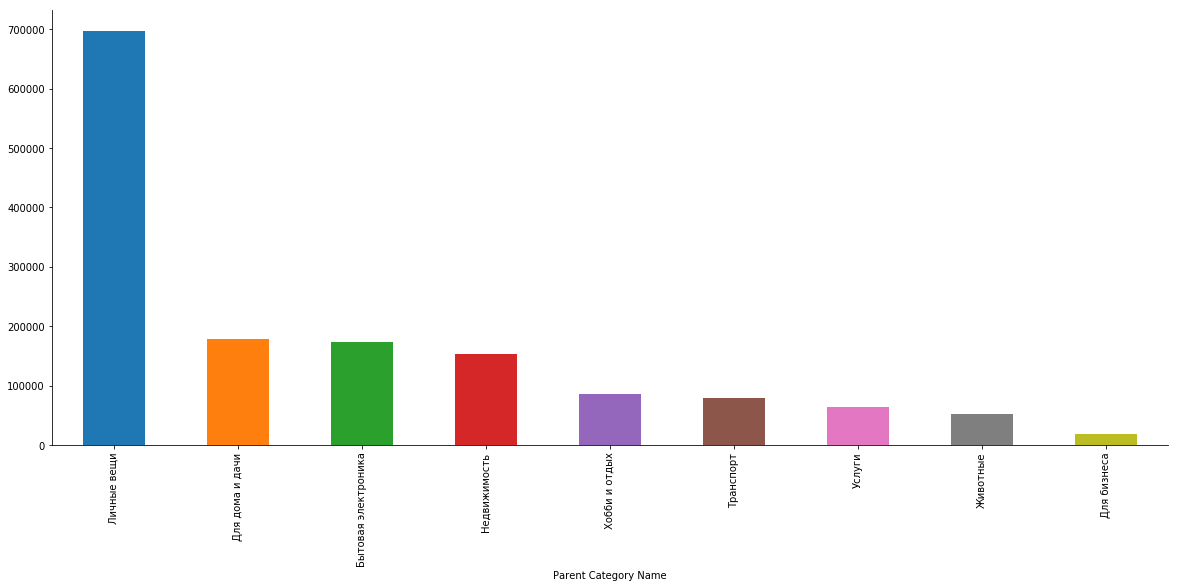

In [9]:
plt.figure(figsize=(20, 8))
all_train_dataset.parent_category_name.value_counts(dropna=False).plot(kind='bar', rot=0)
plt.xlabel('Parent Category Name')
plt.xticks(rotation=90)
sns.despine()
# plt.figure(figsize=(20, 8))
# all_train_dataset.city.value_counts(dropna=False).plot(kind='bar', rot=0)
# plt.xlabel('city')
# plt.xticks(rotation=90)
# sns.despine()

# plt.figure(figsize=(20, 8))
# all_train_dataset.price.value_counts(dropna=False).plot(kind='bar', rot=0)
# plt.xlabel('city')
# plt.xticks(rotation=90)
# sns.despine()

### Algorithms and Techniques

As this is a supervised learning problem with a regression solution with range [0,1]; I want to use different ensemble methods with tuning of hyper-parameters for the best model later for improvements. I tried with following algorithms:
- The ** XGBoostRegressor **  algorithm was choosen after research into Kaggle Competitions and it was found out that it proves extremely effective in such arenas. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It produces an ensemble of weak decision tree learners via additive training (boosting). XGBoost is short for Extreme Gradient Boosting. This is based on Gradient boosted trees. Boosted trees are basically an ensemble of decision trees which are fit sequentially so that each new tree makes up for errors in the previously existing set of trees. The model is ”boosted” by focusing new additions on correcting the residual errors of the last version of the model. Then you take an approximate step in the gradient direction by training a model to predict the gradient given the data. XGBoost algorithm tuning is a tricky process. Heavy computation power is required for such level of tuning. 
- **LGBMRegressor** & **CatBoostRegressor** used because of similar reasons. As these were designed laters, they are faster than XGBoost.

More similar algorithms I will tried are :
- GradientBoostingRegressor
- AdaBoostRegressor

After getting intuitation, I used GridSearchCV for further analysis.

### Benchmark

As this is like a recommended system, I thought of using Decision tree as with GridSearchCV as hyperparameter tuning to save its best model, but later used `RandomForestRegressor` for comparision to other models.

** Random Forest ** Classifier fits number of decision trees on subsamples of a dataset and averages the results.

A random forest is a collection of random decision trees. In which at each node you will randomly draw a subset of features and the decision tree will predict the classification. Then the same is done with several trees and bagged. This ensemble method will reduce overfitting and provide good classification. The bias-variance trade-off for this algorithm is good and therefore the possibility of overfitting is drastically reduced.

** RandomForestRegressor have RMSE error of 0.10 in training data but have 0.24 in validation data,meaning its overfit the data in training set. **

## III. Methodology

### Data Preprocessing

- Data preprocessing/cleaning
    - Text data one-hot encoded for the required text columns (except for item_id, user_id, title, description).
    - As I will be working with csv data, Image related columns converted to bool type.
    - For Outliers detection, I will be using Interquartile range process.
    - filled the missing values with some constant. 
    - Split data into training & validation set

#### Note :* I didn't used [word vector](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/) algorithms (as I am not familiar for those topics right now much.)*

### Preprocess steps functions
---
1. `processData` function is used to process the NaN values in data an also to update different data types as required by different boosting algorithms.
        One e.g. I got somthing like **ValueError: DataFrame.dtypes for data must be int, float or bool. Did not expect the data types in fields item_id, user_id, activation_date, user_type, title_description.**
        
       As These columns have text data with varying lengths, I need to drop them for my algorithm training by boosting algorithm methods.
       
---

2. `uniqueLabelsExtract` function is using LabelEncoder to find different category types for different data in train & test datasets.
[Read more about Label Encoders](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621).

---

3. `encode2Labels` function will encode our text data to their respective category for specific columns.
    
    I used log for price column to adjust range of variation here. (* Using a logarithmic transformation significantly reduces the range of values caused by outliers. * )
    
    Also, for image column, I didn't done processing on those files of zip as per in dataset, But I want to make use of this column to make algorithm check if an image in description effect the outcome or not.

---

### Implementation

- Evaluate Algorithm

** 1. Build Models (try in between AdaBoost, GradientBoost, Lightgbm, Xgboost, Catboost) **

## Training step for evaluating algorithms

1. `train_predict` function used to save different algorithms *train time*, *validation time*, *training error* and validation error*. 

As We can check:  XGBRegressor, CatBootRegressor, LGBMRegressor outperforms GradientBoostingRegressor, AdaBoostRegressor.
Let us view the charts in more details:
    - RandomForestRegressor have RMSE error of 0.10 in training data but have 0.24 in validation data,meaning its overfit the data in training set.
    - AdaBoost speed is fine, but as per RMSE error, it lags behind other algorithms.
    - GradientBoostingRegressor is fine also but I want to explore first 3 in more details, i didn't use it further :)
    - Best one in all for now is LGBMRegressor & CatBoostRegressor as similar range of errors help me build my intuition.

### Refinement

- Model tuning to improve results
    - Selected best model with tuning hyper-parameters. First I will choose a range of parameters in some step increments & also some randomized values for covering large parameter space also.

** 2. Select best model **

#### Training step with hyperparamters

`useStaticParamters` is used to set static paramters for (algorithms I deicded above ) GridSearchCV.

`useDynamicParamters` is used to set dynamic paramters generation for (algorithms I deicded above ) GridSearchCV.

** 3. Make predictions on validation set **

`modelEvaluator` is training each model/learner with GridSearchCV for finding better paramters based on **RMSE metric**

## IV. Results

### Model Evaluation and Validation

Submission @Kaggle of csv file.

![alt text][logo]

[logo]: ./submissions.png "Logo Title Text 2"


As I can compare, XGB outperform other by small margin. But I need to do more traininig for much better results. Top score in this competition is at 0.21 which I am not even close. I will be reading more about word embedding so that i can use them in my training set and not to drop them.



### Justification

Unseen data can tell us about a model scalability, how much good it is. My benchmark model failed on this step only. As I checked my model submission on kaggle private dataset, I am getting accuracy to what I expect with the limited dataset I used here. Because of reduction of dataset, Image processing & text to word vector conversion got skiped which made the model fast to predict to comparable best models exist for this problems at kaggle. Hence, These models seems to be robust. Alongside this, the model seems to be trustable and aligns well with expected solutions outcomes.

## V. Conclusion

### Free-Form Visualization

In [10]:
print(np.sum(train_output > 0.5))
print(np.sum(train_output <= 0.5))

177754
1325670


To check how the dataset vary with different `deal_probability`. In below graph, we can check it with 1% of the dataset that its more towards low range in `deal_probability`.

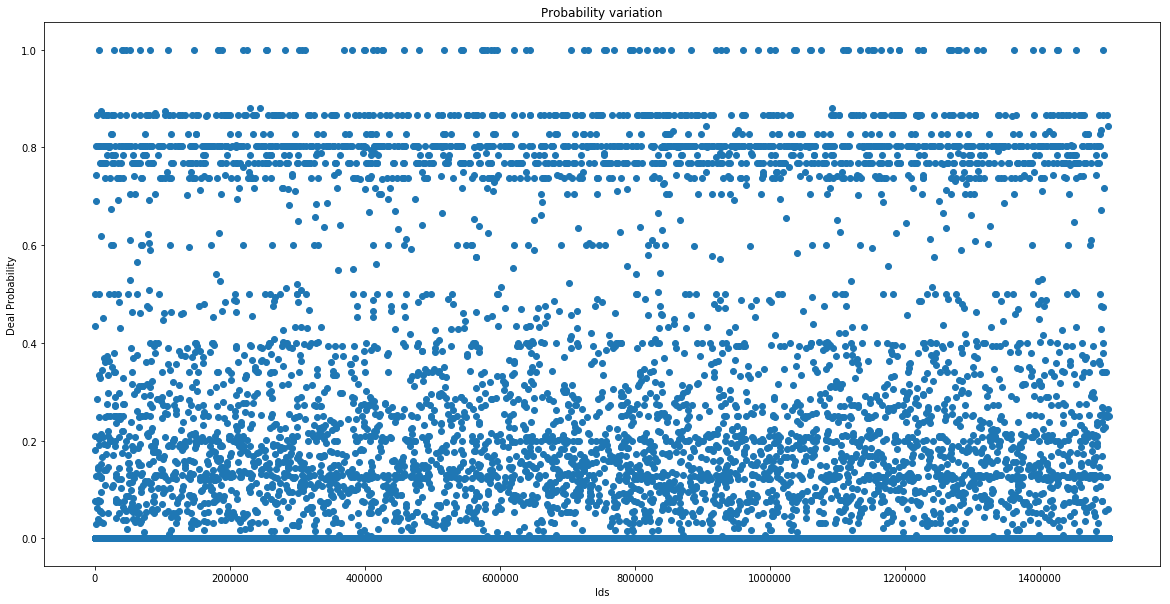

In [11]:
plt.figure(figsize=(20, 10))
dataToShow = 0.01 # percentage
indexes = np.random.randint(0, len(train_output), size=int(dataToShow * len(train_output)))
x_select = train_output.iloc[indexes]
plt.xlabel("Ids")
plt.ylabel("Deal Probability")
plt.title("Probability variation")

plt.scatter(indexes, x_select)
plt.show()

### Reflection

As I find that I need to learn fasttext for text conversion, I tried to do that with some research. I was able to produce word vectors for the text columns too. But later I found that these columns as per word vector will consist of nested list of numeric data(` experiments/Capstone Solution.ipynb `) for each column which any boost algo didn't expect in its dataset. So, After this searching, I had to drop those columns for this projects to complete it and later learn more about them so that I can do better in NLP part.

### Improvement

Their can be various improvements try:
- One can be to use fasttext for text conversion to word vector. I need to read about more about NLP for that so that those text columns can be utilized by boosting algorithms. 
- Use Computer vision to have images tell about product sentiments. It can help more in deducing the probability of buyer interest to some extent.
